In [42]:
import pandas as pd;

# from https://ourworldindata.org/land-use
land_use = pd.read_csv("./land-use-over-the-long-term.csv", dtype={
    "Entity": "str"	,
    "Code": "str"	,
    "Year": "int"	,
    "Built-up Arable land needed to produce a fixed quantity of crops (HYDE (2017))": "float"	,
    "Grazing (HYDE (2017))": "float"	,
    "Cropland (HYDE (2017))": "float",
}, index_col="Year")

# from https://www.worldometers.info/world-population/world-population-by-year
population = pd.read_csv("./world_population.tsv", sep='\t', dtype={"Year":'int',"World Population":'int',"Density\\n(P/Km²)":'int'}, index_col="Year")
# https://ourworldindata.org/fertilizers
fertilizers = pd.read_csv("./fertilizer-consumption-usda.csv", dtype={"Year":'int',"All fertilizers used":'float64'}, index_col="Year")
# https://ourworldindata.org/grapher/arable-land-pin
arable_land = pd.read_csv("./arable-land-pin.csv", dtype={"Year":'int',"Arable land needed to produce a fixed quantity of crops":'float64'}, index_col="Year")

In [43]:
world_land_use= land_use[land_use['Code'] =='OWID_WRL']
world_land_use


world_fertilizers= fertilizers[fertilizers['Code'] =='OWID_WRL']

world_arable_land = arable_land[arable_land['Code'] =='OWID_WRL']

In [44]:
data= population.drop(columns=["Density (P/Km²)"]) \
    .join(world_land_use.drop(columns=["Entity",	"Code"])) \
    .join(world_fertilizers.drop(columns=['Entity','Code'])) \
    .join(world_arable_land.drop(columns=['Entity','Code'])) 

In [45]:
data['Build-up area per Capita'] = data['Built-up Area (HYDE (2017))'] / data['World Population']
data['Grazing per Capita'] = data['Grazing (HYDE (2017))'] / data['World Population']
data['Cropland per Capita'] = data['Cropland (HYDE (2017))'] / data['World Population']
data['Humans Density/km2'] = data['World Population'] / 148429000 
data['Fertilizer used per Capita[t]'] = data['All fertilizers used'] / data['World Population']
cleaned_data= data.sort_index(ascending=True)
cleaned_data.head()

,World Population,Built-up Area (HYDE (2017)),Grazing (HYDE (2017)),Cropland (HYDE (2017)),All fertilizers used,Arable land needed to produce a fixed quantity of crops,Build-up area per Capita,Grazing per Capita,Cropland per Capita,Humans Density/km2,Fertilizer used per Capita[t]
Year,,,,,,,,,,,
1500,450000000,995763.0,517941593.4,260650897.6,NaN,NaN,0.002213,1.150981,0.579224,3.031753,NaN
1600,500000000,1074621.0,583553328.8,272604722.7,NaN,NaN,0.002149,1.167107,0.545209,3.368614,NaN
1700,610000000,1209030.0,667884241.7,294475367.2,NaN,NaN,0.001982,1.094892,0.482747,4.109709,NaN
1760,770000000,1739263.0,784189960.5,369358855.2,NaN,NaN,0.002259,1.018429,0.479687,5.187665,NaN
1804,1000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.737228,NaN


In [46]:
stacked = cleaned_data.stack()

In [47]:
plot_data= stacked.reset_index()
plot_data.rename(columns={'level_1':'Index', 0:'Value'}, inplace=True)
plot_data

,Year,Index,Value
0,1500,World Population,4.500000e+08
1,1500,Built-up Area (HYDE (2017)),9.957630e+05
2,1500,Grazing (HYDE (2017)),5.179416e+08
3,1500,Cropland (HYDE (2017)),2.606509e+08
4,1500,Build-up area per Capita,2.212807e-03
...,...,...,...
473,2016,Build-up area per Capita,7.980117e-03
474,2016,Grazing per Capita,4.395035e-01
475,2016,Cropland per Capita,2.133680e-01
476,2016,Humans Density/km2,5.028682e+01


<Axes: xlabel='Year', ylabel='Value'>

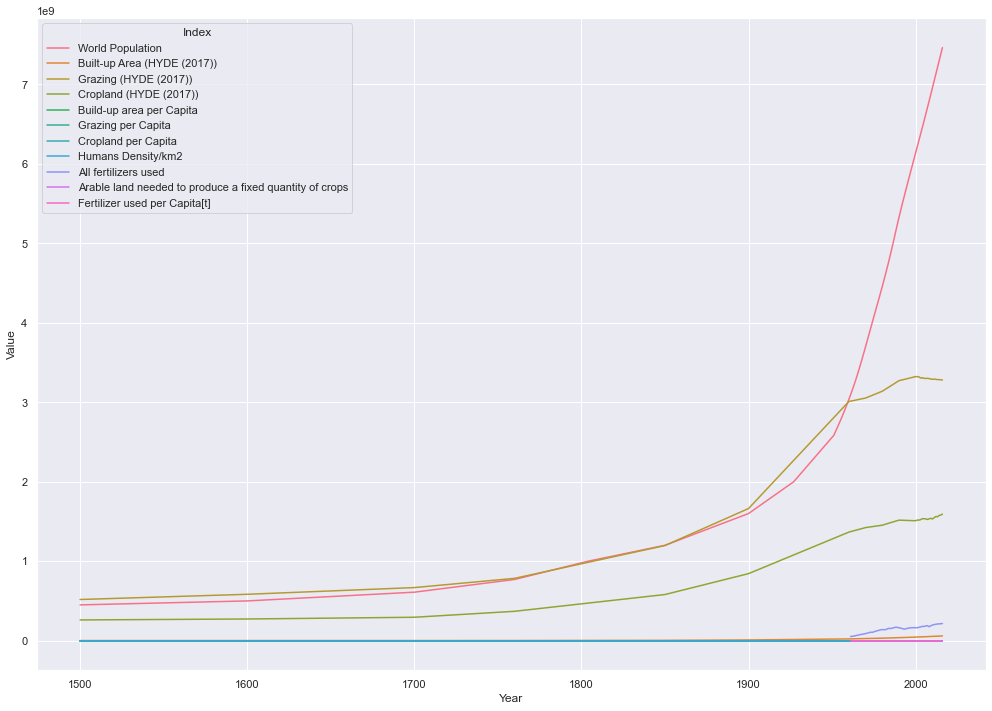

In [48]:
import seaborn as sns

sns.set_theme(style="whitegrid")

import matplotlib.pyplot as plt
plt.style.use("dark_background")

sns.set(rc={"figure.figsize": (17, 12)})


sns.lineplot(
    data=plot_data, #[(plot_data['Index'].str.endswith(' per Capita'))],
    x="Year",
    y="Value",
    hue="Index",
    
)

<Axes: xlabel='Year', ylabel='Value'>

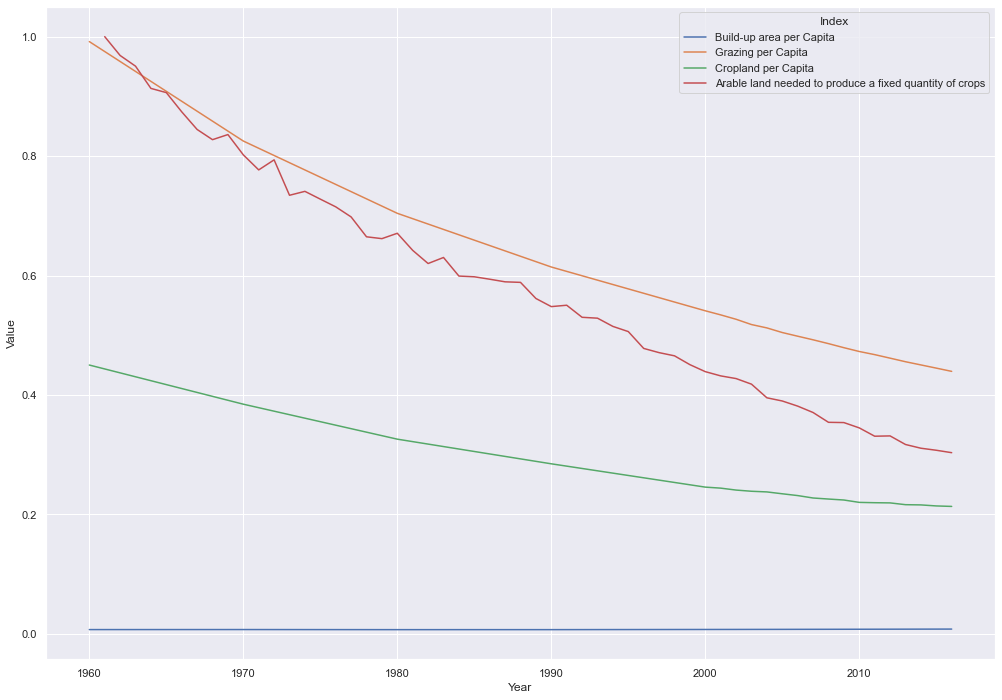

In [49]:
recent_data= cleaned_data.loc[1979:]
recent_plot_data= plot_data[plot_data['Year']> 1959]

sns.lineplot(
    data=recent_plot_data[(recent_plot_data['Index'].str.endswith(' per Capita'))| (recent_plot_data['Index'].str.contains('Arable'))],
    x="Year",
    y="Value",
    hue="Index",
)


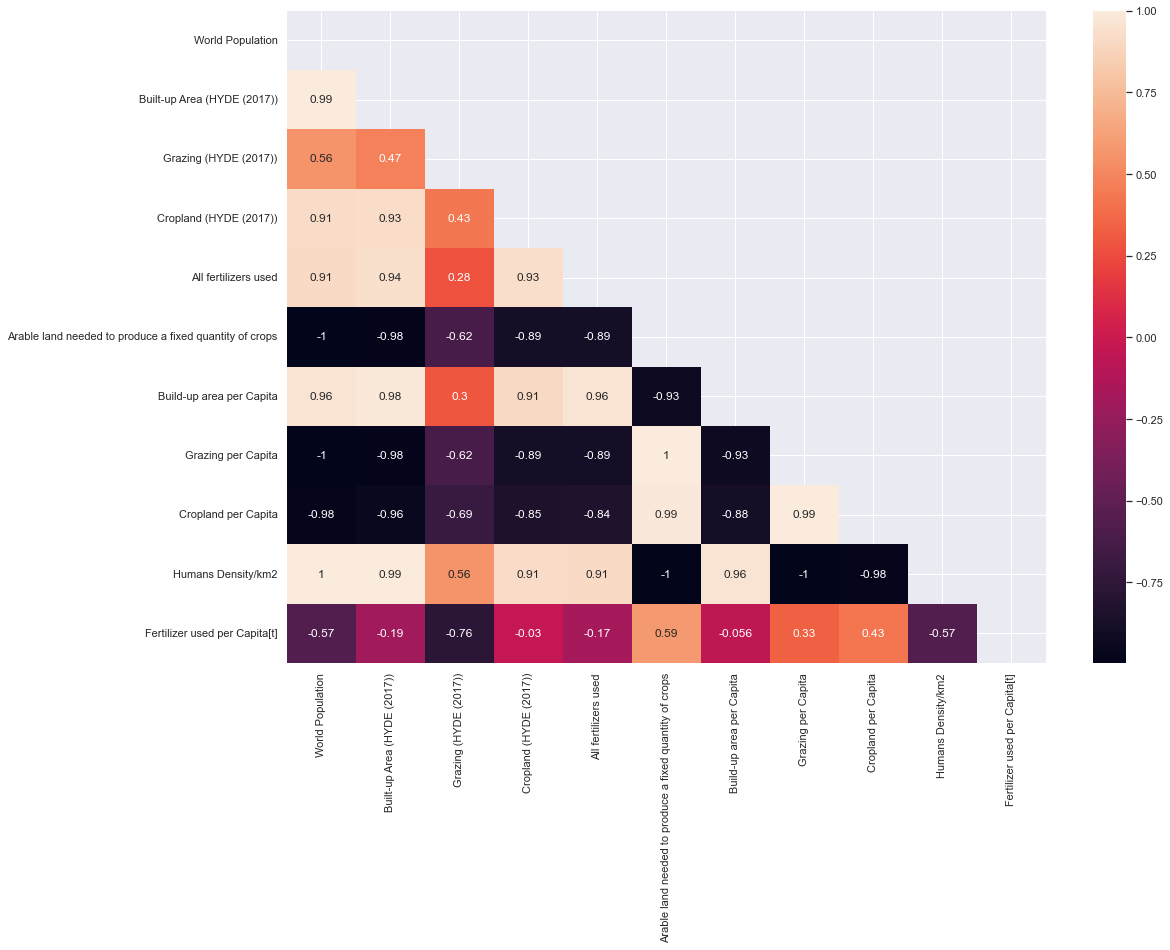

In [50]:
import numpy as np


corr = recent_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
a = sns.heatmap(corr, mask=mask, annot=True,  square=False)


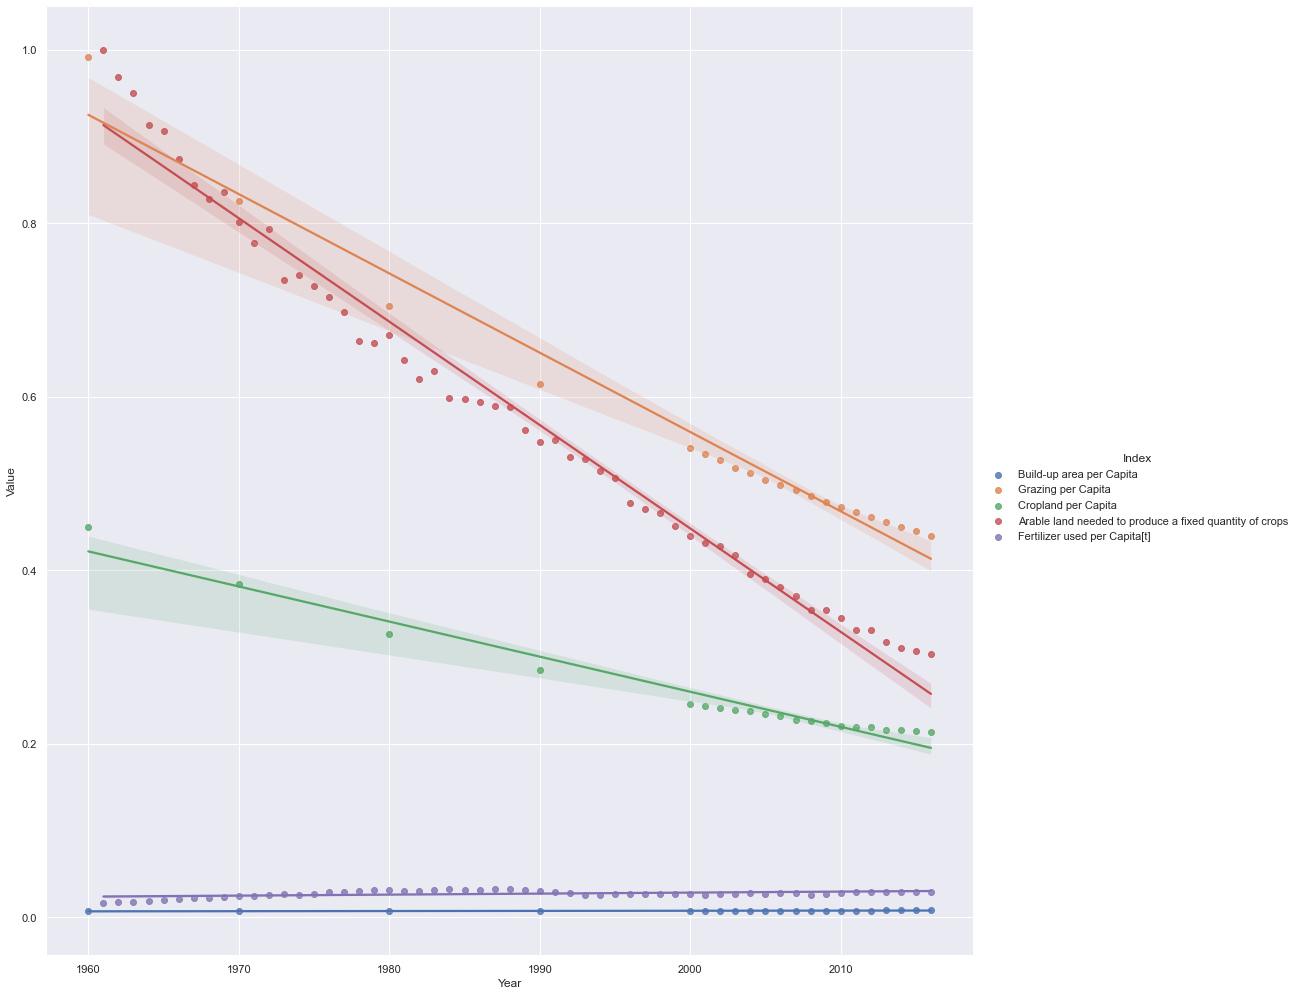

In [51]:
# sns.lmplot(data=director_ratings, x="directorAge", y="averageRating", hue="primaryName", aspect=17/7 ,height=7, legend=False )

sns.lmplot(
    data=recent_plot_data[(recent_plot_data['Index'].str.contains(' per Capita')) | (recent_plot_data['Index'].str.contains('Arable'))],
    x="Year",
    y="Value",
    hue="Index",
    height=14
)



In [52]:

with open('./land_use.csv', 'w') as outfile:
    outfile.write(cleaned_data.to_csv())

with open('./land_use_corr.csv', 'w') as outfile:
    outfile.write(corr.to_csv())